<a href="https://www.kaggle.com/code/aneevinay/student-stress-analysis?scriptVersionId=257052322" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🎓 Introduction

In this project, I explore the academic stress levels experienced by undergraduate students. The data includes various factors such as peer pressure, academic pressure from home, study environment, coping strategies, and habits. The goal is to identify patterns and possible causes of stress to better understand students' academic experiences.


# Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

In [2]:
df=pd.read_csv('/kaggle/input/student-academic-stress-real-world-dataset/academic Stress level - maintainance 1.csv')

# Check the Data

In [3]:
df.shape

(140, 9)

## Glimpse the Data

In [4]:
df.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [5]:
df.describe()

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


## Check missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

There is one missing value in study environment

In [7]:
df.drop(columns=['Timestamp'], inplace=True)
df.rename(columns={
    'Your Academic Stage': 'Academic Stage',
    'Academic pressure from your home': 'Home Pressure',
    'What coping strategy you use as a student?': 'Coping Strategy',
    'Do you have any bad habits like smoking, drinking on a daily basis?': 'Bad Habits',
    'What would you rate the academic  competition in your student life': 'Academic Competition',
    'Rate your academic stress index': 'Stress Index'
}, inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Academic Stage                    140 non-null    object
 1   Peer pressure                     140 non-null    int64 
 2   Home Pressure                     140 non-null    int64 
 3   Study Environment                 139 non-null    object
 4   Coping Strategy                   140 non-null    object
 5   Bad Habits                        140 non-null    object
 6   Academic Competition              140 non-null    int64 
 7   Rate your academic stress index   140 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 8.9+ KB


# Data Exploration

## Explore categorical features


Column: Academic Stage
Academic Stage
undergraduate    100
high school       29
post-graduate     11
Name: count, dtype: int64


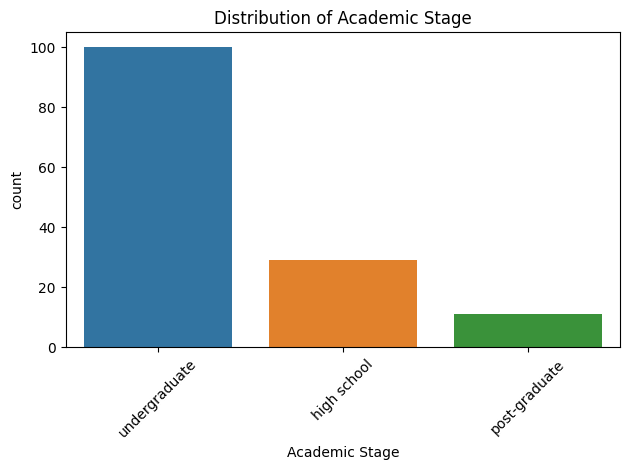


Column: Study Environment
Study Environment
Peaceful     69
disrupted    38
Noisy        32
Name: count, dtype: int64


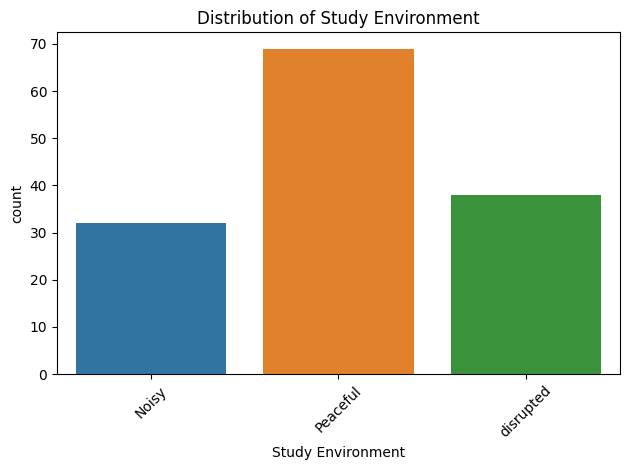


Column: Coping Strategy
Coping Strategy
Analyze the situation and handle it with intellect    87
Emotional breakdown (crying a lot)                    32
Social support (friends, family)                      21
Name: count, dtype: int64


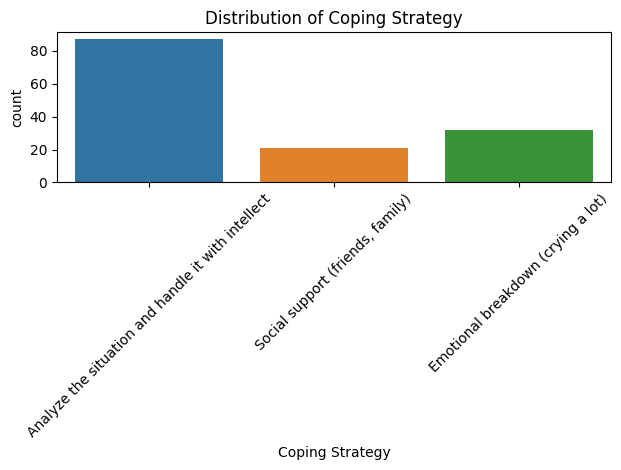


Column: Bad Habits
Bad Habits
No                   123
Yes                   10
prefer not to say      7
Name: count, dtype: int64


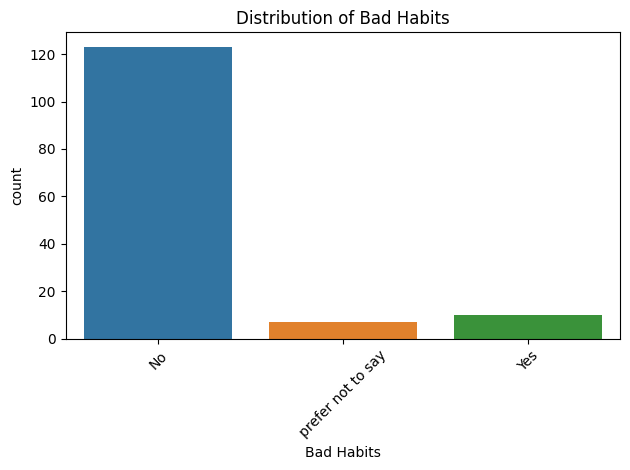

In [9]:
categorical_columns= df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()